# Chapter 1

We start with Figure 1.

>Probability density functions (pdf) of central and noncentral F distributions as influenced by the noncentrality parameter (l). The x axis represents the percentile of the pdf. Values for the probability density functions were derived from analysis of a simulated experiment with 8 entries, 3 replications, a grand mean of 5000 kg and a standard deviation of 500 kg (CV = 10). The central distribution (solid gray line), where l = 0 is equivalent to an effect size of 0 or failure to reject the H0. Values for l were simulated as a small effect (double line) equal to 10% of the mean (l = 10.05); a moderate effect (dashed line) equal to 16% of the mean (l = 28) and a large effect (dotted line) equal to 25% of the mean (l = 65). The central and noncentral distributions overlap for the 10% difference scenario, indicating that the power of the experiment to detect those differences will be lower than for the larger effects. The numerator df were equal to 7 and the denominator df were equal to 14 in these analyses.

First, we'll define some constants

In [1]:
entries = 8
replicates = 3
grand_mean = 5000
sd = 500
cv = 100*sd/grand_mean
print(cv)

10.0


The graph plots frequency over percent, with percent ranging from 0 to 10. We'll create a sequence in python using

In [2]:
#TODO: clean up ranges
percents = list(range(1,101))
for i in range(0,100):
    percents[i] = percents[i]/10

Now, to calculate the PDF for F, we need scipy

x = np.linspace(f.ppf(0.01, dfn, dfd),
...                 f.ppf(0.99, dfn, dfd), 100)

In [3]:
from scipy.stats import f

ndf, ddf = entries-1, (replicates-1)*(entries-1)
print(ndf,ddf)
frequencies = list(range(1,101))
for i in range(0,100):
    frequencies[i] = f.pdf(percents[i], ndf, ddf)

7 14


To compute the non-central F PDF, we'll need an additional function.

In [4]:
from scipy.stats import ncf

frequencies_10 = list(range(1,101))
frequencies_16 = list(range(1,101))
frequencies_25 = list(range(1,101))
for i in range(0,100):
    frequencies_10[i] = ncf.pdf(percents[i], ndf, ddf, 10.5)
    frequencies_16[i] = ncf.pdf(percents[i], ndf, ddf, 28)
    frequencies_25[i] = ncf.pdf(percents[i], ndf, ddf, 65)

The matplotlib seems to be the preferred choice for creating graphics.

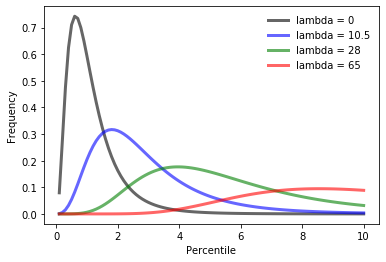

In [5]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
ax.plot(percents, frequencies,'black', lw=3, alpha=0.6, label='lambda = 0')
ax.plot(percents, frequencies_10,'blue', lw=3, alpha=0.6, label='lambda = 10.5')
ax.plot(percents, frequencies_16,'green', lw=3, alpha=0.6, label='lambda = 28')
ax.plot(percents, frequencies_25,'red', lw=3, alpha=0.6, label='lambda = 65')
ax.legend(loc='best', frameon=False)
plt.xlabel('Percentile')
plt.ylabel('Frequency')
plt.show()

# Chapter 2

We start by attempting to reproduce Table 3. This will give us a chance to experiment with ragged arrays.

First, define the parameters

In [6]:
ddf = [2, 3, 4, 5, 10, 20, 120]
ndf = [1, 2, 3, 4, 5, 10, 20]

In [7]:
from scipy.stats import f
#scipy.stats.f.ppf(q=1-0.05, dfn=3, dfd=39)
F_01_tbl = []
F_05_tbl = []
for i in range(0,len(ddf)-1) :
    row_01 = []
    row_05 = []
    for j in range(0,i+1) :
        row_01.append(f.ppf(q=1-0.01,dfn=ndf[j], dfd=ddf[i]))
        row_05.append(f.ppf(q=1-0.05,dfn=ndf[j], dfd=ddf[i]))
    F_01_tbl.append(row_01)
    F_05_tbl.append(row_05)
for row in F_01_tbl:
    print(row)
for row in F_05_tbl:
    print(row)

[98.50251256281399]
[34.116221564529795, 30.816520350478235]
[21.197689584391295, 17.99999999999999, 16.694369237175078]
[16.25817703983365, 13.273933612004825, 12.059953691651982, 11.39192807134976]
[10.04428927339659, 7.559432157547899, 6.552312557515209, 5.994338661629364, 5.636326187669078]
[8.09595806408569, 5.848931924611141, 4.938193382310539, 4.430690161437775, 4.102684630584732, 3.3681863891887414]
[18.512820512820497]
[10.127964486013928, 9.552094495921155]
[7.708647422176786, 6.944271909999155, 6.591382116425578]
[6.607890973703367, 5.786135043349964, 5.40945131805649, 5.192167772803923]
[4.9646027437307145, 4.1028210151304005, 3.7082648190468435, 3.478049690765229, 3.3258345304130112]
[4.351243503329288, 3.492828476735632, 3.09839121214078, 2.8660814020156584, 2.7108898372096917, 2.3478775669983114]


We'll skip Fig 1. It's similar to Fig 1 in Chapter 1. Instead, we'll move to the analysis of case study data.

First, we need to read the data from excel.

In [8]:
import pandas

statbean_data = pandas.read_excel('../supplements/Statbean Data.xlsx')
type(statbean_data)

pandas.core.frame.DataFrame

What can we do with a DataFrame? First, can we reproduce a box-whisker plot? 

It looks like pandas has a function

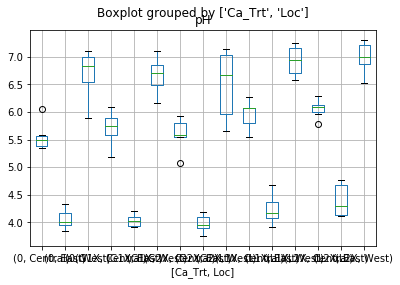

In [9]:
boxplot = statbean_data.boxplot(column=['pH'], by=['Ca_Trt', 'Loc'])

Good enough for now. We can clean up the plot to match Fig 1 later. Instead, move on to summary in Table 7
